<a href="https://colab.research.google.com/github/SantiagoAlbarracin/TP3-SOA/blob/main/TP3_Ej1_CPU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#--------------------------------------INSTALACION DE BIBLIOTECA 'VALIDATORS'--------------------------------------#
!pip install validators

In [7]:
#--------------------------------------BIBLIOTECAS--------------------------------------#

import validators


#-----------------------------------PARAMETRO IMAGEN------------------------------------#
#@title Ingrese la url de una imagen:

url_imagen = "https://2.bp.blogspot.com/-mvPq9y2Lux4/W-HCc58z6zI/AAAAAAAAapE/ICN6LzwjGzgp2Y5yyJ8zTpXLbnfDAFo9ACK4BGAYYCw/s1600/Screenshot_6.jpg" #@param {type: "string" }

#Verificacion de que el usuario haya ingresado una URL de imagen valida
if(url_imagen == "" or not validators.url(url_imagen)):
  raise TypeError("Debe ingresar la url de una imagen.")

!wget {url_imagen} -O imagen

--2021-06-27 13:26:40--  https://2.bp.blogspot.com/-mvPq9y2Lux4/W-HCc58z6zI/AAAAAAAAapE/ICN6LzwjGzgp2Y5yyJ8zTpXLbnfDAFo9ACK4BGAYYCw/s1600/Screenshot_6.jpg
Resolving 2.bp.blogspot.com (2.bp.blogspot.com)... 74.125.202.132, 2607:f8b0:4001:c22::84
Connecting to 2.bp.blogspot.com (2.bp.blogspot.com)|74.125.202.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 502418 (491K) [image/jpeg]
Saving to: ‘imagen’

imagen              100%[===================>] 490.64K  --.-KB/s    in 0.01s   

2021-06-27 13:26:40 (48.9 MB/s) - ‘imagen’ saved [502418/502418]



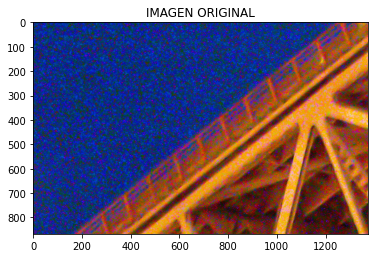

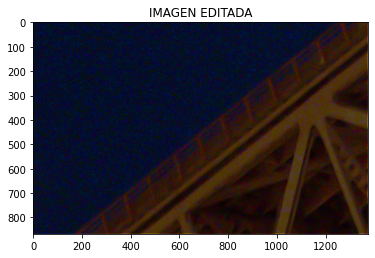

In [11]:
#--------------------------------------BIBLIOTECAS--------------------------------------#

from datetime import datetime
import numpy as npy
import matplotlib.pyplot as plt
from PIL import Image

#--------------------------------------FUNCIONES--------------------------------------#
def low_pass_filter(array_imagen_cpu, x, y, imagen_width, imagen_height, array_imagen_resultado_cpu, kernel):
    suma_pixel = 0
    #Recorrido de la matriz kernel para operar con los pixeles "vecinos" de la imagen
    for i in range (-1, 1):
      for j in range (-1, 1):
            suma_pixel = array_imagen_cpu[x+j][y+i] * kernel[j+1][i+1] + suma_pixel
    array_imagen_resultado_cpu[x][y] = suma_pixel

#---------------------------------------CODIGO--------------------------------------------#
kernel = [[0    ,1/8  ,0],
          [1/8  ,1/4  ,1/8],
          [0    ,1/8  ,0]]

#Apertura de la imagen 
imagen = Image.open('imagen')

#Obtencion de ancho y altura de la imagen
imagen_height, imagen_width = imagen.size

#Calculo de la cantidad de pixeles de la imagen
cantidad_pixeles = imagen_height * imagen_width

#Pasaje de la imagen a un array
array_imagen_cpu = npy.asarray(imagen)

#Generacion de array donde se guardara el resultado
array_imagen_resultado_cpu = array_imagen_cpu.copy()

#Ploteo de la imagen original
plt.figure()
plt.title("IMAGEN ORIGINAL")
imgplot=plt.imshow( array_imagen_cpu )

#Recorrido de la imagen aplicando el low pass filter a cada pixel.
#No se consideran los bordes de la imagen para que no se tomen pixeles que no son de la imagen para el aplicado del filtro.
for y in range( 1, imagen_height - 1 ):
  for x in range( 1, imagen_width - 1 ):
    low_pass_filter(array_imagen_resultado_cpu, x, y, imagen_width, imagen_height, array_imagen_resultado_cpu, kernel)

#Ploteo de la imagen resultado
plt.figure()
plt.title("IMAGEN EDITADA")
imgplot=plt.imshow( array_imagen_resultado_cpu )